# Linear regression

In [1]:
import torch
import matplotlib.pyplot as plt

## Data

In [2]:
true_b = 1
true_w = 2
N = 100

# Data Generation
torch.manual_seed(42)
x = torch.rand(N)
epsilon = (0.1 * torch.randn(N))
y = true_b + true_w * x + epsilon

# Plot

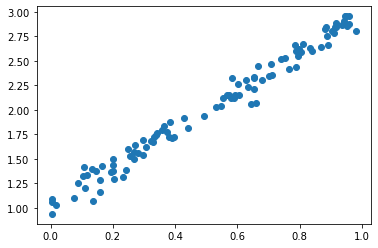

In [3]:
plt.scatter(x, y)

# PyTorch framework model and train

In [4]:
model = torch.nn.Sequential(torch.nn.Linear(1, 1))
lr = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_fn = torch.nn.MSELoss(reduction='mean')

x_train = x.view(N, 1)
y_train = y.view(N, 1)

n_epochs = 1000
losses = []

# remember initial model parameters
w, b = model.parameters()
params = [(w.data.detach().clone(), b.data.detach().clone())]
grads = []

for epoch in range(n_epochs):
    # Sets model to TRAIN mode
    model.train()

    # Step 1 - Computes model's predicted output - forward pass
    y_hat = model(x_train)

    # Step 2 - Computes the loss
    loss = loss_fn(y_hat, y_train)
    losses.append(loss.item())

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()    

    # Step 4 - Updates parameters using gradients and the learning rate
    optimizer.step()
    
    # Remember params and grads
    w, b = model.parameters()
    params.append((w.data.detach().clone(), b.data.detach().clone()))
    grads.append((w.grad.detach().clone(), b.grad.detach().clone()))
    
    # Annulate gradients
    optimizer.zero_grad()

params = torch.tensor(params)
grads = torch.tensor(grads)




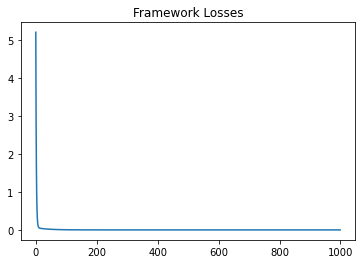

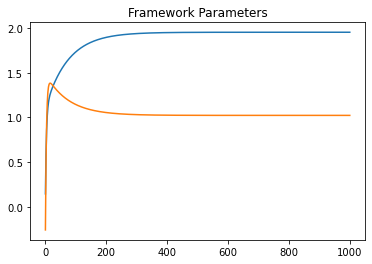

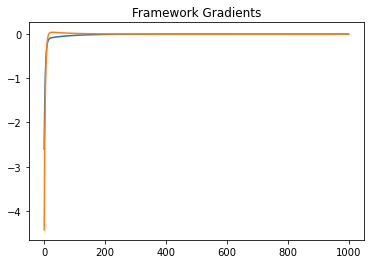

In [5]:
plt.title("Framework Losses")
plt.plot(losses)
plt.show()

plt.title("Framework Parameters")
plt.plot(params)
plt.show()

plt.title("Framework Gradients")
plt.plot(grads)
plt.show()


# Manual model and train

In [6]:
#initial model parameters
w, b = params[0]

manual_losses = []
manual_params = [(w, b)]
manual_grads = []

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    y_hat = w * x_train + b

    # Step 2 - Computes the loss
    loss = 1 / N * torch.sum((y_hat - y_train) ** 2)
    manual_losses.append(float(loss))

    # Step 3 - Computes gradients for both "b" and "w" parameters
    wgrad = 2 / N * torch.sum((y_hat - y_train) * x_train)
    bgrad = 2 / N * torch.sum((y_hat - y_train))
    
    # Step 4 - Updates parameters using gradients and the learning rate
    w = w - lr * wgrad
    b = b - lr * bgrad

    # Remember params and grads
    manual_grads.append((wgrad, bgrad))
    manual_params.append((w, b))

manual_params = torch.tensor(manual_params)
manual_grads = torch.tensor(manual_grads)

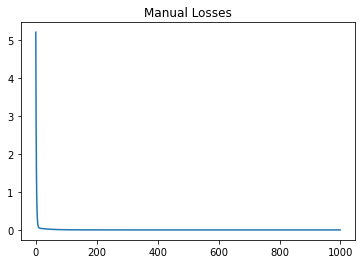

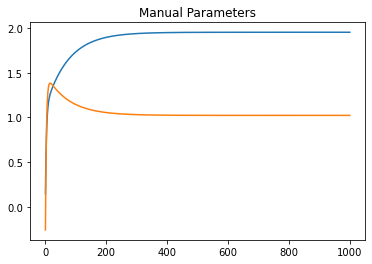

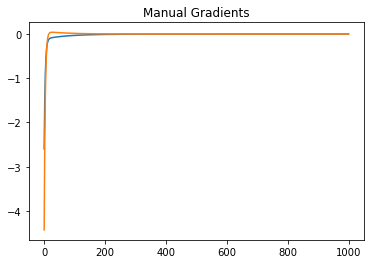

In [7]:
plt.title("Manual Losses")
plt.plot(manual_losses)
plt.show()

plt.title("Manual Parameters")
plt.plot(manual_params)
plt.show()

plt.title("Manual Gradients")
plt.plot(grads)
plt.show()

In [8]:
for mp, p in zip(manual_params, params):
    print(mp, p)

tensor([ 0.1447, -0.2590]) tensor([ 0.1447, -0.2590])
tensor([0.4043, 0.1841]) tensor([0.4043, 0.1841])
tensor([0.5999, 0.5117]) tensor([0.5999, 0.5117])
tensor([0.7480, 0.7537]) tensor([0.7480, 0.7537])
tensor([0.8607, 0.9320]) tensor([0.8607, 0.9320])
tensor([0.9470, 1.0630]) tensor([0.9470, 1.0630])
tensor([1.0138, 1.1589]) tensor([1.0138, 1.1589])
tensor([1.0659, 1.2287]) tensor([1.0659, 1.2287])
tensor([1.1072, 1.2792]) tensor([1.1072, 1.2792])
tensor([1.1404, 1.3153]) tensor([1.1404, 1.3153])
tensor([1.1675, 1.3408]) tensor([1.1675, 1.3408])
tensor([1.1901, 1.3583]) tensor([1.1901, 1.3583])
tensor([1.2093, 1.3701]) tensor([1.2093, 1.3701])
tensor([1.2259, 1.3775]) tensor([1.2259, 1.3775])
tensor([1.2406, 1.3817]) tensor([1.2406, 1.3817])
tensor([1.2538, 1.3836]) tensor([1.2538, 1.3836])
tensor([1.2659, 1.3837]) tensor([1.2659, 1.3837])
tensor([1.2771, 1.3825]) tensor([1.2771, 1.3825])
tensor([1.2876, 1.3805]) tensor([1.2876, 1.3805])
tensor([1.2977, 1.3777]) tensor([1.2977, 1.377

In [10]:
print("True parameters:", true_w, true_b)
print("Framework parameters", params[-1])
print("Manual parameters", params[-1])

True parameters: 2 1
Framework parameters tensor([1.9538, 1.0231])
Manual parameters tensor([1.9538, 1.0231])
